In [ ]:
!git clone https://github.com/Anu0705/NLP-Shared-Task.git

fatal: destination path 'NLP-Shared-Task' already exists and is not an empty directory.


In [ ]:
# import shutil
# shutil.rmtree('/content/NLP-Shared-Task')

In [ ]:
import json
  
# Opening JSON file
f = open('/content/NLP-Shared-Task/data/train/NER_TRAIN_JUDGEMENT.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)

In [ ]:
# Load dev data
import json
  
# Opening JSON file
f1 = open('/content/NLP-Shared-Task/data/dev/NER_DEV_JUDGEMENT.json')
  
# returns JSON object as 
# a dictionary
dev_data = json.load(f1)

In [ ]:
!pip install simpletransformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from simpletransformers.ner import NERModel,NERArgs

In [ ]:
def train_seq(data):
    train_list = []
    for i in range(len(data)):
        p = data[i]
        for key in p:
            if key == "data":
                k = p[key]
                for key in k:
                    if key == 'text':
                        n1 = k[key]
                        train_list.append(n1)
                        
    return train_list

In [ ]:
# working code

def ner_seq(data):
    ner_list = []
    for i in range(len(data)):
        p = data[i]
        for key in p:
            if key == 'annotations':
                k = p[key] 
                for dict_a in k:
                    for key in dict_a:
                        ner_sublist = []
                        m = dict_a[key] 
                        for dict_b in m:
                            for key_b in dict_b:
                                if key_b == 'value':
                                    n = dict_b[key_b]
                                    for key_in in n:
                                        if key_in == 'text':
                                            n1 = n[key_in]
                                            ner_sublist.append(n1)
                        ner_list.append(ner_sublist)
    return ner_list

In [ ]:
def labels_seq(data):
    labels_list = []
    for i in range(len(data)):
        p = data[i]
        for key in p:
            if key == 'annotations':
                k = p[key] 
                for dict_a in k:
                    for key in dict_a:
                        labels_sublist = []
                        m = dict_a[key] 
                        for dict_b in m:
                            for key_b in dict_b:
                                if key_b == 'value':
                                    n = dict_b[key_b]
                                    for key_in in n:
                                        if key_in == 'labels':
                                            n1 = n[key_in]
                                            labels_sublist.append(n1)
                        labels_list.append(labels_sublist)
    return labels_list

In [ ]:
def start_seq(data):
    start_list = []
    for i in range(len(data)):
        p = data[i]
        for key in p:
            if key == 'annotations':
                k = p[key] 
                for dict_a in k:
                    for key in dict_a:
                        start_sublist = []
                        m = dict_a[key] 
                        for dict_b in m:
                            for key_b in dict_b:
                                if key_b == 'value':
                                    n = dict_b[key_b]
                                    for key_in in n:
                                        if key_in == 'start':
                                            n1 = n[key_in]
                                            start_sublist.append(n1)
                        start_list.append(start_sublist)
    return start_list

In [ ]:
def end_seq(data):
    end_list = []
    for i in range(len(data)):
        p = data[i]
        for key in p:
            if key == 'annotations':
                k = p[key] 
                for dict_a in k:
                    for key in dict_a:
                        end_sublist = []
                        m = dict_a[key] 
                        for dict_b in m:
                            for key_b in dict_b:
                                if key_b == 'value':
                                    n = dict_b[key_b]
                                    for key_in in n:
                                        if key_in == 'end':
                                            n1 = n[key_in]
                                            end_sublist.append(n1)
                        end_list.append(end_sublist)
    return end_list

In [ ]:
# tokenize each sentence using spacy
# unfreeze the labels list
# assign labels for evry word in the sentence

import re
import spacy
import itertools
nlp = spacy.load('en_core_web_sm')

def str_upper(lst):
  return [i.upper() for i in lst]

def train_tokenize(train_data,train_start,train_end,train_tag):

  train_labels = []
  for i in train_tag:
      train_labels.append(list(itertools.chain.from_iterable(i)))
      
  train_ner = []
  for sent, s, e in zip(train_data, train_start, train_end):
      x = sent
      for start, end in zip(s, e):
          x=x.replace(x[start:end], x[start:end].upper())
      train_ner.append(x)

  train_ner_token = []

  for i in range(len(train_ner)):
      doc_ = nlp(train_ner[i])
      for doc in doc_:
          tokens = [token.text for token in doc_]
      train_ner_token.append(tokens)

  for i in range(len(train_ner_token)):
    x1_1 = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", file) for file in train_ner_token[i]]
    str_list = list(filter(None, x1_1))
    train_ner_token[i] = str_list

  train_ner_labels = []
  for k in range(len(train_ner_token)): # no. of sent
      label_list = ['OTHER']*len(train_ner_token[k])
      for i in range(len(train_ner_token[k])): # token
          x = str_upper(train_judge_ner[k])
          for j in range(len(x)): # no. of ner's in each sent
              if train_ner_token[k][i] in x[j]:
                  label_list[i] = train_labels[k][j]
                  break
      train_ner_labels.append(label_list)
    

  return train_ner_token,train_ner_labels

In [ ]:
def str_upper(lst):
  return [i.upper() for i in lst]

def dev_tokenize(dev_data,dev_start,dev_end,dev_tag):
  dev_labels = []
  for i in dev_tag:
    dev_labels.append(list(itertools.chain.from_iterable(i)))
    

  dev_ner_token = []


  for i in range(len(dev_data)):
      doc_ = nlp(dev_data[i])
      for doc in doc_:
          tokens = [token.text for token in doc_]
      dev_ner_token.append(tokens)

  dev_no_token = []
  for i in range(len(dev_ner_token)):
    x1_1 = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,'\n]", "", file) for file in dev_ner_token[i]]
    x2_2 = [i.strip() for i in x1_1]
    str_list = list(filter(None, x2_2))
    dev_ner_token[i] = str_list
    dev_no_token.append(len(str_list))



  dev_ner_labels = []
  for k in range(len(dev_ner_token)): # no. of sent
      label_list = ['OTHER']*len(dev_ner_token[k])
      for i in range(len(dev_ner_token[k])): # token
          x = str_upper(dev_judge_ner[k])
          for j in range(len(x)): # no. of ner's in each sent
              if dev_ner_token[k][i] in x[j]:
                  label_list[i] = dev_labels[k][j]
                  break
      dev_ner_labels.append(label_list)

  return dev_ner_token,dev_ner_labels,dev_no_token

In [ ]:
def get_dev_data(ner_token,ner_labels, no_token):

  df_dev = pd.DataFrame()
  df_dev['dev_ner'] = ner_token
  # df['train_sent_ner'] = train_judge_ner
  df_dev['dev_labels'] = ner_labels
  df_dev['dev_no_token'] = no_token
  df_dev['sent_id'] = df_dev.index

  df_dev = df_dev.set_index(['sent_id']).apply(pd.Series.explode).reset_index()
  df_dev.rename(columns={"sent_id":"sentence_id","dev_ner":"x_test","dev_labels":"y_test"}, inplace =True)
  df_dev.drop('sentence_id', axis=1, inplace=True)

  # get dev sentences as dataframe

  df1_dev = pd.DataFrame()
  df1_dev['dev_judge'] = dev_judge

  return df_dev,df1_dev

In [ ]:
# convert the data to dataframe and transform it to fit Transformer models

import pandas as pd

def get_df(ner,labels):

  df = pd.DataFrame()
  df['train_ner'] = ner
  # df['train_sent_ner'] = train_judge_ner
  df['train_labels'] = labels
  df['sent_id'] = df.index

  df = df.set_index(['sent_id']).apply(pd.Series.explode).reset_index()
  df.rename(columns={"sent_id":"sentence_id","train_ner":"words","train_labels":"labels"}, inplace =True)
  label = df["labels"].unique().tolist()
  return df,label


In [ ]:
# prepare the dataset and split as train and test

from sklearn.model_selection import train_test_split

def get_data(df):

  X = df[["sentence_id","words"]]
  Y = df["labels"]

  x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.2)

  train_data = pd.DataFrame({"sentence_id":x_train["sentence_id"],"words":x_train["words"],"labels":y_train})
  test_data = pd.DataFrame({"sentence_id":x_test["sentence_id"],"words":x_test["words"],"labels":y_test})

  return train_data,test_data

In [ ]:
from sklearn.metrics import accuracy_score

def get_bert_model(label,train_data,test_data):

  args = NERArgs()
  args.num_train_epochs = 20
  args.learning_rate = 1e-4
  args.overwrite_output_dir =True
  args.train_batch_size = 32
  args.eval_batch_size = 32

  model = NERModel('bert', 'bert-base-cased',labels=label,args =args, use_cuda=True)

  model.train_model(train_data,eval_data = test_data,acc=accuracy_score)

  result, model_outputs, preds_list = model.eval_model(test_data)

  return model,result


In [ ]:
from sklearn.metrics import accuracy_score

def get_xlnet_model(label,train_data,test_data):

  args = NERArgs()
  args.num_train_epochs = 20
  args.learning_rate = 1e-4
  args.overwrite_output_dir =True
  args.train_batch_size = 32
  args.eval_batch_size = 32

  model = NERModel("xlnet","xlnet-base-cased",labels=label,args =args, use_cuda=True)

  model.train_model(train_data,eval_data = test_data,acc=accuracy_score)

  result, model_outputs, preds_list = model.eval_model(test_data)

  return model,result

In [ ]:
from sklearn.metrics import accuracy_score

def get_distilbert_model(label,train_data,test_data):

  args = NERArgs()
  args.num_train_epochs = 20
  args.learning_rate = 1e-4
  args.overwrite_output_dir =True
  args.train_batch_size = 32
  args.eval_batch_size = 32

  model = NERModel("distilbert","distilbert-base-cased",labels=label,args =args, use_cuda=True)

  model.train_model(train_data,eval_data = test_data,acc=accuracy_score)

  result, model_outputs, preds_list = model.eval_model(test_data)

  return model,result

In [ ]:
def get_prediction(model,df,col):

  pred_list = []
  for i in range(len(df[col])):
    print([df[col][i]])
    print(i)
    prediction, model_output = model.predict([df[col][i]])
    pred_list.append(prediction)


  df_pred = pd.DataFrame()
  df_pred['y_pred'] = ''

  list_pred = []
  for i in range(len(pred_list)):
    for j in range(len(pred_list[i])):
      x = pred_list[i][j]
      for k in x:
        for value in k.values():
          list_pred.append(value)

  df_pred['y_pred'] = list_pred

  return df_pred

In [ ]:
from sklearn import metrics

def get_metrics(y_test,y_pred):

  metric = metrics.classification_report(y_test,y_pred)

  return metric


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def get_cm(y_test,y_pred,lab):
  cm = confusion_matrix(y_test,y_pred, labels=lab)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()

In [ ]:
train_judge = train_seq(data)
train_judge_ner = ner_seq(data)
train_judge_labels = labels_seq(data)
train_judge_st = start_seq(data)
train_judge_en = end_seq(data)
train_ner_token,train_ner_labels = train_tokenize(train_judge,train_judge_st,train_judge_en,train_judge_labels)
df,labels = get_df(train_ner_token,train_ner_labels)
train_data, test_data = get_data(df)

In [ ]:
bert_model,model_result_bert = get_bert_model(labels,train_data,test_data)
xlnet_model,model_result_roberta = get_xlnet_model(labels,train_data,test_data)
distilbert_model,model_result_distilbert = get_distilbert_model(labels,train_data,test_data)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/291 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: OTHER seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.8/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: OTHER_PERSON seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.8/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: WITNESS seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.8/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: DATE seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.8/dist-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning: PROVISION seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/usr/local/lib/python3.8/dist-packages/seqeval/metrics/sequence_labe

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/291 [00:00<?, ?it/s]

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForTokenClassification: ['vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this 

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 1 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/291 [00:00<?, ?it/s]

In [ ]:
dev_judge = train_seq(dev_data)
dev_judge_ner = ner_seq(dev_data)
dev_judge_labels = labels_seq(dev_data)
dev_judge_st = start_seq(dev_data)
dev_judge_en = end_seq(dev_data)
dev_ner_token,dev_ner_labels, dev_no_tokens = dev_tokenize(dev_judge,dev_judge_st,dev_judge_en,dev_judge_labels)
#dev_df,dev_labels = get_df(dev_ner_token,dev_ner_labels)
df_dev,df1_dev = get_dev_data(dev_ner_token,dev_ner_labels, dev_no_tokens) 

In [ ]:
test_list = []
sum = 0
for i in dev_ner_token[:101]:
  sum += len(i)
  s= ' '.join(i)
  test_list.append(s)
test = pd.DataFrame()
test['dev_ner'] = test_list

In [ ]:
sum

3515

In [ ]:
dev_judge_sampled = dev_judge[0:99]
df_dev_sampled = df_dev.loc[0:3514]

In [ ]:
# len(dev_judge_sampled)

In [ ]:
# df_dev_sampled.loc[0:3514]

In [ ]:
# dev_ner_token[:11]

In [ ]:
# dev_ner_token[10]

In [ ]:
# test[:11]

In [ ]:
# y_pred_bert = get_prediction(bert_model,test[:1],'dev_judge')
y_pred_bert = get_prediction(bert_model,test,'dev_ner')
y_pred_xlnet = get_prediction(xlnet_model,test,'dev_ner')
y_pred_distilbert = get_prediction(distilbert_model,test,'dev_ner')

['True our Constitution has no due process clause or the VIII Amendment but in this branch of law after RC Cooper v Union of India 1970 1 SCC 248 and Maneka Gandhi v Union of India 1978 1 SCC 248 the consequence is the same']
0


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['See Principles of Statutory Interpretation by Justice GP Singh 9th Edn 2004 at p 438']
1


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Their Lordships have said It is a sound rule of construction of a statute firmly established in England as far back as 1584 when Heydon s case was decided that']
2


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In para 13 of the plaint it has been further averred that When the plaintiffs asked the defendant to obtain requisite documents immediately the defendant assured the plaintiffs that he would obtain the requisite documents and would be available on 29122004 at the office of the Sub\xadRegistrar Geeta Colony Delhi and would execute the sale deed']
3


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Counsel for appellants contended that who is the Jagirdar against whom the legal fiction is to apply is not pleaded by the claim petitioners and the scope and ambit of Rule 2 of the Rules regarding Grant of Pattadari rights in non Khalsa villages 1356 Fasli framed under Section 172 of the Hyderabad Land Revenue Act 1317 Fasli is nebulous']
4


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Further section 193 of the SG Act specifies that unless a different intention appears rules contained in section 20 to 24 rules for ascertaining the intention of the parties as to the time at which the property and goods is to passed to the buyer']
5


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Hence the Trial Court convicted the Appellant under Section 132 read with Section 131e of the PC Act as well as Sections 120B and 193 of the IPC and sentenced him to rigorous imprisonment for two years and payment of fine of Rs 15 lakhs']
6


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The LoA stipulated that 17 The allotment of said land is subject to the outcome of the Appeal Suit No 2742007 in OS No 15505 WP Nos 1967007 2066707 and 2204307 pending before the Honble High Court of Andhra Pradesh PART A 4']
7


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The appeal filed by assessee is against order of CITA7 Pune dated 22052018 relating to assessment year 2015 16 against order passed under section 1433 of the Income tax Act 1961 in short the Act 2']
8


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In this context we have also to bear in mind the exposition of law by a Constitution Bench in State of Punjab v Jagdip Singh [ 1964 4 SCR 964 AIR 1964 SC 521 ]']
9


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Deficiencies in investigation by way of omissions and lapses on the part of investigating agency can not in themselves justify a total rejection of the prosecution case Honble the Supreme Court has again in the case of Surajit Sarkar Vs State of West Bengal36 has addressed the issue and held that 49']
10


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['If a Family Court before which an application is made under Section 7 of the Act finds that the minor whose guardianship is sought in the application ordinarily resides within its territorial jurisdiction such Family Court is bound to entertain the application and decide that application on merit in accordance with law']
11


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Explanation 2 The terms on which an adjournment or postponement may be granted include in appropriate cases the payment of costs by the prosecution or the accused']
12


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In this regard in Rohitbhai Jivanlal Patel vs State of Gujarat decided by honble Apex Court in Crl Appeal no 5082019 decided on 15032019 it has been held as under']
13


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['A claim for arrears of rent has also been held to be an actionable claim State of Bihar v Maharajadhiraja Sir Kameshwar Singh [ 1952 SCR 889 AIR 1952 SC 252 ] SCR at p 910']
14


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['On 14th February 2018 one Mr Amar N Barot General Secretary of the Textile Labour Association made a mention before the court that the judgment in the case may either be dictated or the matter may be released and sent to the regular bench 2']
15


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['This will be clarified in the instant case by comparison of sub section 1 of Section 15 with sub section 1 of Section 15 A']
16


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['However the Minister for Legislative Affairs at 10 am on 13032018 stood up and directly recommended for expulsion of 2 members and suspension of 11 members and the Speaker immediately accepted and expelled both the petitioners and suspended the others without there being any deliberation discussion debate or giving reasonable opportunity to explain their version before expelling them']
17


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is submitted by the Counsel for the State that in the compliance report dated 9 11 2020 it was mentioned that the respondents no 3 to 5 have been line attached but looking to the seriousness of the misconduct committed by them today they have been placed under suspension']
18


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The contention of Mr Datta therefore has been that learned Judges of this Court have uniformly held upon duly reading the said order that the retired employees are entitled to pension from the date of refund and there being no valid reason for taking a different view there is no need for clarification of the said order accordingly GA No 464 of 2018 merits outright dismissal']
19


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The defendant no 9 also filed an application under Order 7 Rule 11 CPC wherein it was averred that the plaintiff neither filed the suit in accordance with the provisions of Rajasthan Court Fee and Suit valuation Amendment Act 2009 nor in accordance with the provisions of Section 304 of the Municipality Act']
20


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['another writ petition under Article 32 of the Constitution of India was again filed being WPC No616 of 2020 which was dismissed as withdrawn on 21072020 the order is extracted herein under “ After arguing for sometime Mr Sanjay Hegde learned senior counsel']
21


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['When a statute is impugned under Article 14 what the court has to decide is whether the statute is so arbitrary or unreasonable that it must be struck down']
22


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The learned Commissioner of Income Tax Appeals erred in not following the ratio laid down by ITAT']
23


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['3 BRA Bihar University Muzaffarpur through its Registrar']
24


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In B Shama Rao v Union Territory of Pondicherry [ AIR 1967 SC 1480 1967 2 SCR 650 20 STC 215 ] it was observed ‘ it is trite to say that a decision is binding not because of its conclusions but in regard to its ratio and the principles laid down therein ’']
25


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The existing highway has only two lane and approximately 25 meters wide land']
26


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['No doubt the benefit of the scheme will be available from the specified date irrespective of the fact when the concerned Government servant actually retired from service']
27


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Hence the contention that has been raised by Plaintiffs being a fact in issue same is the subject matter of AS NO862019 evidence which can not be appreciated by this Court in the present suit']
28


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In pursuance to the aforesaid decision A1 to A13 went to the residence of the deceased on 18072002 at about 930 pm in three material objects namely i an auto rickshaw ii a motorbike and iii a jeep armed with deadly weapons like swords knives chopper etc']
29


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Mr Kapur also submitted that if one lifted the veil of SEARS and Sarda one would find that these two entities were creatures of Govind Sarda and his group']
30


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Sri Iyer Senior Advocate sought to read the aforesaid judgement where the contents of the White Paper issued by the Central Government quoted to suggest that these are the findings of the Government of India having taken note by the Apex Court and therefore should be treated to be concluded']
31


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The petitioner Sukhbir Kataria who is accused no14 in Criminal Complaint bearing No74136 dated 04062013 Annexure P1 titled as Om Parkash Vs Satish Kumar and others seeks quashing of the same alongwith the summoning order dated 22072013 Annexure P2 whereby he had been summoned to face trial under Section 420 467 468 471 120 B IPC']
32


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The Apex Court however observed that applying of belting system for grant of compensation was not appropriate and therefore compensation for B category area was also enhanced to the one as determined by the Honble High Court for A category']
33


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['They did not even suggest the witness that he was siding with the claimants']
34


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The testimony of the prosecutrix PW4 must have been appreciated in the light of the background of the case more so the prosecutrix PW4 was reluctant to go back to the house of her aunt and complained the act of sexual intercourse committed by the respondent accused to her teachers Pooja Mahajan PW1 and Ritubala PW2']
35


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In case of Property Owners Association and Ors vs State of Maharashtra and Ors reported in MANU MH07352019 the Bombay high Court has held as under 181']
36


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Digitally signed by RAJENDER SINGH KARKI Signing Date13012021 185439 31 Claimants to respond to the offer of the Insurance Company within 30 days']
37


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The Apex Court in the case of MD Frozen Foods Exports Pvt Ltd & ors supra has framed legal issues which are as under respondent can be carried on along with the SARFAESI proceedings simultaneously B']
38


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['I can not understand when even according to the police the said information was received on telephone how and what basis a computer photograph could be prepared']
39


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['However this is not the only kind of fee which can be charged']
40


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['v In State of Punjab v Joginder Singh4 the Apex Court relying on the principle laid down by it in Gopal Vinayak Godse v State of Maharashtra [ 1961 AIR 600 ] and Maru Ram2 held that power under Articles 72 and 161 of the Constitution of India is absolute and can not be lettered by any statutory provision such']
41


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Shri Parasaran further submits that the fundamental right of the Muslim community under Article 25 to offer namaz is not affected because the Babri Masjid was not a mosque with particular significance for that religion']
42


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Correspondingly by delegated legislation incorporated by the Central Government it may extend that time limit']
43


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['On facts the front side open space usurpations by the petitioner are in excess of 50 % and on one side 33 13 % and it is impossible to manoeuvre even a mobile fire fighting equipment through one metre passage on that side and reasons for violation not forthcoming']
44


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Pertinently Plot no 8 which is a part of Zone C is not a part of the central vista region']
45


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The complainant along with other neighbours went to search deceased Dharam Chand on 8 th February 1999 and at village Bhagwanpura outside the godown of brother deceased Dharam Chand found his motorcycle but his whereabouts were not made known']
46


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It includes articles having the characteristics of textile floor coverings eg thickness stiffness and strength but intended for use for other purposes for example as wall hangings or table covers or for other furnishing purposes']
47


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['And which power to designate inter State supply also comes from Articles 246A 269A1 read with 269A5 as discussed earlier']
48


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Further the Assessing Officer is directed to deposit the amount of Rs759185 in HDFC Bank Fort Mumbai and Rs34265 in State Bank of India Byculla Mumbai within a period of one week from today']
49


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['2 T Vasanthakumar vs Vijayakumari reported in AIR 2015 Supreme Court 2240 wherein it has held that Negotiable Instruments Act 26 of 1881 Ss138 and 139 CCNO79192017 Dishonour of Cheque Appeal against acquittal Cheque as well as signature on it not disputed by accused respondent']
50


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The petition was filed through Sh Vijay Pahwa General Power of Attorney and it was asserted in the petition under Section 13 B of the Rent Act that 1 of 23 50 % share of the demised premises had been purchased by the landlord from Sh Vinod Malhotra vide sale deed No4226 registered on 20122007 with Sub Registrar Chandigarh']
51


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is seen from the record that the arbitration proceedings were held by Arbitrator Ms Rashmi Jain Advocate at her office at Shop No12 Club Road Market Punjabi Bagh New Delhi110026']
52


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['According to her the patient arrived at 2123 hours and was examined at 2125 hours']
53


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Such signed statements are covered by the definition of document given in section 3 of the Indian Evidence Act']
54


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['He had not seen any other shop of Imambaksh and Jameel']
55


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['But the revisit should not be fact centric or quantum centric']
56


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['We note that the Finance Bill 2021 has brought in an amendment which disallows the employees contribution made in PF and ESI if not made within the due date as prescribed by the respective statutes PF and ESI Act']
57


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['PW1 in his evidence has categorically stated that the deceased Mukhtar Ahmed was elected as the Chairman of the Municipality Jaspur in the election prior to the election at the time of occurrence and that his wife Smt Sameena Begum had contested the next election for the post of the Chairman against Smt Farida Begum and Sameena Begum had lost that election']
58


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['There is another important factor which is taken for consideration is that the alleged sample was taken on 26071992 and it was sent to the Chemical Examiner on 12081992']
59


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Sri Sunil BGanu learned counsel would however press into service Section 143c and assert that the plaintiffs suit is barred thereunder']
60


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In support of his contention he relied upon the decision of the Honble Supreme Court in Authorized Officer State Bank of Travancore vs Mathew KC2']
61


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The management witness Shri Gopinath Dasgupta DRM North Bengal Regional Office Ramprakash Sarkar sub staff Mahabirsthan Branch as well as Ms Omit Namchu management witness stated in their examination in chief that the appellant made a confessional statement in writing accepting the fraudulent withdrawal of Rs23000only from the bank account of Shri Mrinal Kanti Ghosh']
62


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The origins of the law can also 80 of 164 be traced to the principles of natural justice as developed in the following cases in A K Kraipak v Union of India 1969 2 SCC 262 it was held that the rules of natural justice operate in areas not covered by any law']
63


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In the first minutes no explanation was given for increase in the authorized share capital of the company whereas in the second it was stated that funds were needed to make repayment of loans of the creditors']
64


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Applying the law aforesaid the acquisition of land stood completed on publication of Section 3 G declaration and the same remains unaffected']
65


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['He also deposed that he examined PW1 and after her examination additional offences under Sections 5 6 and 7 of PITA Act ie ITP Act and Sections 294 376 & 34 RPC were added on different dates']
66


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['But if the information given clearly mentions the commission of a cognizable offence there is no other option but 2014 2 SCC 1 to register an FIR forthwith']
67


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Thereafter he was told about his legal rights under Section 50 of the NDPS Act 1985 and a notice under Section 50 of the NDPS Act 1985 was served to him']
68


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['This is because prima facie every legislation is prospective see para 7 of the Constitution Bench judgment in Janardan Reddy v The State reported in AIR 1951 SC 124']
69


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In this connection reference may be had to the Full Bench decision of the Andhra Pradesh High Court in V Narayana Rao v State of AP [ AIR 1987 AP 53 1987 Lab IC 152 1986 2 Andh LT 258 ] striking down the enhancement of reservation from 25 % to 44 % for OBCs']
70


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['i An order of injunction attachment or appointment of a receiver can be initiated only at the instance of the bank or the financial institution']
71


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The Reference Court enhanced the amount of compensation to Rs180000 per hectare for cultivable land and Rs90000 per hectare for uncultivable land']
72


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Suo Motu Writ Petition C No1 of 2020 dated 07052021 KL J WP Nos20421 of 2019 & batch Arnesh Kumar v State of Bihar [ 2014 8 SCC 273 ] during pandemic 10']
73


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Before re appreciating the evidence we would like to make it clear at the first instance itself that though charge sheet is filed against accused Nos1 to 7 invoking offences under Sections 120B 212 302 147 148 149 506B of IPC and Section 27 of Indian Arms Act']
74


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Chapter XIII deals with offences punishments for violation of various clauses of the Act and procedures thereon']
75


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Therefore crime No 1362018 under Section 30634 of IPC was registered on 22052018']
76


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Clause 1 of the agreement provided that the agent would be allowed 5 % commission on the total value of the order']
77


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['So a person can not be both a']
78


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is not in dispute that there is no witness to the fact alleged by the NIA that appellants accused persons used the bicycles to purchase and planted bombs causing explosion at Malegaon']
79


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Chapter X of the Indian Railways Code for the Engineering Department issued by the Ministry of Railways Railway Board Government of India relates to the custody management and disposal of land']
80


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['in Laxmi Pat Surana v Union Bank of India Civil Appeal No 2734 of 2020 a judgment delivered on 26032021 this Court after referring to various judgments of this Court including the judgment in Babulal Vardharji Gurjar v Veer Gurjar Aluminium Industries P Ltd 2020 15 SCC 1 [ “ Babulal ” ] then held “ 35']
81


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['CCNo24682018 That the accused shall deposit the fine amount of Rs90000 and in default of deposit of said fine amount he shall undergo a simple imprisonment for one month']
82


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The accused agreed to repay the said amount with interest at the rate of 18 % per annum and towards the repayment of the said amount the accused had issued a cheque dated 14102008 in favor of the complainant for a sum of Rs20 lakhs']
83


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Our attention was drawn to Parashuram Pottery Works Co Ltd V ITO Circle I Ward A Rajkot 1977 106 ITR 1 SC which records that the Assessing Officer entrusted with the task of calculating and realizing tax should familiarize themselves with the relevant provisions and become well versed with the law on the subject']
84


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Therefore the statement of witness AD2 Bhag Chand Khateek can not be considered distrust worthy that his name in the charge sheet is not mentioned as witness emphasis supplied 28']
85


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['At this juncture it would be apt to reproduce herein below Section 23 of the DV Act which reads as under 23 Power to grant interim and ex parte orders']
86


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is the case of the petitioner that the petitioner was elected as a member of Town Panchayath Sargur from ward No11 of Sargur Town HDKote Taluk Mysuru District and has been serving the public since 2015']
87


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['i The learned Counsel referred to the earlier litigation filed by Mr LMMenezes and others in Application No5672002']
88


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The petitioner Dr Gollapalli Madhuri who is serving on the post of Medical Officer Primary Health Centre Narayanakhed Sanga Reddy District has challenged the constitutional validity of the executive instructions dated 2930102014 issued by the Government of India']
89


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The principle of proportionality has been recognized by this Court in Vikram Singh Vicky v Union of India16 wherein it was stated that punishment must be proportionate to the nature and gravity of offences']
90


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is also mentioned that a letter has been sent to the Radiology Department']
91


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['After deducting 30 % towards income tax the income would be Rs19639']
92


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Sri Arun Kumar Rai Ld Counsel for the accused has raised the point that PW1 Anand Kumar Keshri told in para 3 of his deposition that the accused was firing inside the Shop had pistols in his both hands']
93


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Even though the assessee during the assessment proceedings mentioned that the supply of machinery for TPD Plant and the installation and commissioning services are separate and independent of each other a careful perusal of this document reveal that as per the terms and conditions of the contract the effective mandate given to the assessee is in the nature of composite contract']
94


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The defendant No1 continued to manage the affairs of the mill till 1989 when he resigned']
95


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It was observed that judgment in BK Pavitra I held that no exercise as mandated by Nagaraj was undertaken by the State of Karnataka before providing reservation in promotion and providing consequential seniority and the State had not collected quantifiable data on the three parameters']
96


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Thus on the basis of these documents when the shop number and address of the shop is not known these factual aspects of the matter can not be examined in writ jurisdiction Accordingly the Writ Petition No12837 of 2019 is also dismissed']
97


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Such Award dated 12072012 has been proved as Ex R1']
98


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Challenging the same the State of Telangana filed Civil Appeal No4060 61 of 2020 in the Supreme Court of India']
99


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In 1985 the provisions of the Rent Act as applicable to the State of Punjab were amended by the Legislature of the State of Punjab vide Punjab Act 2 of 1985 by inserting new Sections 13A 18A and 18B a new Second Schedule and amendments in Sections 13 and 19 substantially similar to those that had been effected by Ordinance 14 of 1976']
100


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['True our Constitution has no due process clause or the VIII Amendment but in this branch of law after RC Cooper v Union of India 1970 1 SCC 248 and Maneka Gandhi v Union of India 1978 1 SCC 248 the consequence is the same']
0


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['See Principles of Statutory Interpretation by Justice GP Singh 9th Edn 2004 at p 438']
1


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Their Lordships have said It is a sound rule of construction of a statute firmly established in England as far back as 1584 when Heydon s case was decided that']
2


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In para 13 of the plaint it has been further averred that When the plaintiffs asked the defendant to obtain requisite documents immediately the defendant assured the plaintiffs that he would obtain the requisite documents and would be available on 29122004 at the office of the Sub\xadRegistrar Geeta Colony Delhi and would execute the sale deed']
3


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Counsel for appellants contended that who is the Jagirdar against whom the legal fiction is to apply is not pleaded by the claim petitioners and the scope and ambit of Rule 2 of the Rules regarding Grant of Pattadari rights in non Khalsa villages 1356 Fasli framed under Section 172 of the Hyderabad Land Revenue Act 1317 Fasli is nebulous']
4


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Further section 193 of the SG Act specifies that unless a different intention appears rules contained in section 20 to 24 rules for ascertaining the intention of the parties as to the time at which the property and goods is to passed to the buyer']
5


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Hence the Trial Court convicted the Appellant under Section 132 read with Section 131e of the PC Act as well as Sections 120B and 193 of the IPC and sentenced him to rigorous imprisonment for two years and payment of fine of Rs 15 lakhs']
6


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The LoA stipulated that 17 The allotment of said land is subject to the outcome of the Appeal Suit No 2742007 in OS No 15505 WP Nos 1967007 2066707 and 2204307 pending before the Honble High Court of Andhra Pradesh PART A 4']
7


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The appeal filed by assessee is against order of CITA7 Pune dated 22052018 relating to assessment year 2015 16 against order passed under section 1433 of the Income tax Act 1961 in short the Act 2']
8


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In this context we have also to bear in mind the exposition of law by a Constitution Bench in State of Punjab v Jagdip Singh [ 1964 4 SCR 964 AIR 1964 SC 521 ]']
9


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Deficiencies in investigation by way of omissions and lapses on the part of investigating agency can not in themselves justify a total rejection of the prosecution case Honble the Supreme Court has again in the case of Surajit Sarkar Vs State of West Bengal36 has addressed the issue and held that 49']
10


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['If a Family Court before which an application is made under Section 7 of the Act finds that the minor whose guardianship is sought in the application ordinarily resides within its territorial jurisdiction such Family Court is bound to entertain the application and decide that application on merit in accordance with law']
11


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Explanation 2 The terms on which an adjournment or postponement may be granted include in appropriate cases the payment of costs by the prosecution or the accused']
12


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In this regard in Rohitbhai Jivanlal Patel vs State of Gujarat decided by honble Apex Court in Crl Appeal no 5082019 decided on 15032019 it has been held as under']
13


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['A claim for arrears of rent has also been held to be an actionable claim State of Bihar v Maharajadhiraja Sir Kameshwar Singh [ 1952 SCR 889 AIR 1952 SC 252 ] SCR at p 910']
14


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['On 14th February 2018 one Mr Amar N Barot General Secretary of the Textile Labour Association made a mention before the court that the judgment in the case may either be dictated or the matter may be released and sent to the regular bench 2']
15


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['This will be clarified in the instant case by comparison of sub section 1 of Section 15 with sub section 1 of Section 15 A']
16


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['However the Minister for Legislative Affairs at 10 am on 13032018 stood up and directly recommended for expulsion of 2 members and suspension of 11 members and the Speaker immediately accepted and expelled both the petitioners and suspended the others without there being any deliberation discussion debate or giving reasonable opportunity to explain their version before expelling them']
17


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is submitted by the Counsel for the State that in the compliance report dated 9 11 2020 it was mentioned that the respondents no 3 to 5 have been line attached but looking to the seriousness of the misconduct committed by them today they have been placed under suspension']
18


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The contention of Mr Datta therefore has been that learned Judges of this Court have uniformly held upon duly reading the said order that the retired employees are entitled to pension from the date of refund and there being no valid reason for taking a different view there is no need for clarification of the said order accordingly GA No 464 of 2018 merits outright dismissal']
19


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The defendant no 9 also filed an application under Order 7 Rule 11 CPC wherein it was averred that the plaintiff neither filed the suit in accordance with the provisions of Rajasthan Court Fee and Suit valuation Amendment Act 2009 nor in accordance with the provisions of Section 304 of the Municipality Act']
20


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['another writ petition under Article 32 of the Constitution of India was again filed being WPC No616 of 2020 which was dismissed as withdrawn on 21072020 the order is extracted herein under “ After arguing for sometime Mr Sanjay Hegde learned senior counsel']
21


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['When a statute is impugned under Article 14 what the court has to decide is whether the statute is so arbitrary or unreasonable that it must be struck down']
22


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The learned Commissioner of Income Tax Appeals erred in not following the ratio laid down by ITAT']
23


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['3 BRA Bihar University Muzaffarpur through its Registrar']
24


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In B Shama Rao v Union Territory of Pondicherry [ AIR 1967 SC 1480 1967 2 SCR 650 20 STC 215 ] it was observed ‘ it is trite to say that a decision is binding not because of its conclusions but in regard to its ratio and the principles laid down therein ’']
25


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The existing highway has only two lane and approximately 25 meters wide land']
26


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['No doubt the benefit of the scheme will be available from the specified date irrespective of the fact when the concerned Government servant actually retired from service']
27


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Hence the contention that has been raised by Plaintiffs being a fact in issue same is the subject matter of AS NO862019 evidence which can not be appreciated by this Court in the present suit']
28


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In pursuance to the aforesaid decision A1 to A13 went to the residence of the deceased on 18072002 at about 930 pm in three material objects namely i an auto rickshaw ii a motorbike and iii a jeep armed with deadly weapons like swords knives chopper etc']
29


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Mr Kapur also submitted that if one lifted the veil of SEARS and Sarda one would find that these two entities were creatures of Govind Sarda and his group']
30


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Sri Iyer Senior Advocate sought to read the aforesaid judgement where the contents of the White Paper issued by the Central Government quoted to suggest that these are the findings of the Government of India having taken note by the Apex Court and therefore should be treated to be concluded']
31


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The petitioner Sukhbir Kataria who is accused no14 in Criminal Complaint bearing No74136 dated 04062013 Annexure P1 titled as Om Parkash Vs Satish Kumar and others seeks quashing of the same alongwith the summoning order dated 22072013 Annexure P2 whereby he had been summoned to face trial under Section 420 467 468 471 120 B IPC']
32


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The Apex Court however observed that applying of belting system for grant of compensation was not appropriate and therefore compensation for B category area was also enhanced to the one as determined by the Honble High Court for A category']
33


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['They did not even suggest the witness that he was siding with the claimants']
34


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The testimony of the prosecutrix PW4 must have been appreciated in the light of the background of the case more so the prosecutrix PW4 was reluctant to go back to the house of her aunt and complained the act of sexual intercourse committed by the respondent accused to her teachers Pooja Mahajan PW1 and Ritubala PW2']
35


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In case of Property Owners Association and Ors vs State of Maharashtra and Ors reported in MANU MH07352019 the Bombay high Court has held as under 181']
36


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Digitally signed by RAJENDER SINGH KARKI Signing Date13012021 185439 31 Claimants to respond to the offer of the Insurance Company within 30 days']
37


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The Apex Court in the case of MD Frozen Foods Exports Pvt Ltd & ors supra has framed legal issues which are as under respondent can be carried on along with the SARFAESI proceedings simultaneously B']
38


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['I can not understand when even according to the police the said information was received on telephone how and what basis a computer photograph could be prepared']
39


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['However this is not the only kind of fee which can be charged']
40


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['v In State of Punjab v Joginder Singh4 the Apex Court relying on the principle laid down by it in Gopal Vinayak Godse v State of Maharashtra [ 1961 AIR 600 ] and Maru Ram2 held that power under Articles 72 and 161 of the Constitution of India is absolute and can not be lettered by any statutory provision such']
41


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Shri Parasaran further submits that the fundamental right of the Muslim community under Article 25 to offer namaz is not affected because the Babri Masjid was not a mosque with particular significance for that religion']
42


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Correspondingly by delegated legislation incorporated by the Central Government it may extend that time limit']
43


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['On facts the front side open space usurpations by the petitioner are in excess of 50 % and on one side 33 13 % and it is impossible to manoeuvre even a mobile fire fighting equipment through one metre passage on that side and reasons for violation not forthcoming']
44


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Pertinently Plot no 8 which is a part of Zone C is not a part of the central vista region']
45


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The complainant along with other neighbours went to search deceased Dharam Chand on 8 th February 1999 and at village Bhagwanpura outside the godown of brother deceased Dharam Chand found his motorcycle but his whereabouts were not made known']
46


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It includes articles having the characteristics of textile floor coverings eg thickness stiffness and strength but intended for use for other purposes for example as wall hangings or table covers or for other furnishing purposes']
47


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['And which power to designate inter State supply also comes from Articles 246A 269A1 read with 269A5 as discussed earlier']
48


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Further the Assessing Officer is directed to deposit the amount of Rs759185 in HDFC Bank Fort Mumbai and Rs34265 in State Bank of India Byculla Mumbai within a period of one week from today']
49


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['2 T Vasanthakumar vs Vijayakumari reported in AIR 2015 Supreme Court 2240 wherein it has held that Negotiable Instruments Act 26 of 1881 Ss138 and 139 CCNO79192017 Dishonour of Cheque Appeal against acquittal Cheque as well as signature on it not disputed by accused respondent']
50


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The petition was filed through Sh Vijay Pahwa General Power of Attorney and it was asserted in the petition under Section 13 B of the Rent Act that 1 of 23 50 % share of the demised premises had been purchased by the landlord from Sh Vinod Malhotra vide sale deed No4226 registered on 20122007 with Sub Registrar Chandigarh']
51


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is seen from the record that the arbitration proceedings were held by Arbitrator Ms Rashmi Jain Advocate at her office at Shop No12 Club Road Market Punjabi Bagh New Delhi110026']
52


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['According to her the patient arrived at 2123 hours and was examined at 2125 hours']
53


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Such signed statements are covered by the definition of document given in section 3 of the Indian Evidence Act']
54


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['He had not seen any other shop of Imambaksh and Jameel']
55


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['But the revisit should not be fact centric or quantum centric']
56


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['We note that the Finance Bill 2021 has brought in an amendment which disallows the employees contribution made in PF and ESI if not made within the due date as prescribed by the respective statutes PF and ESI Act']
57


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['PW1 in his evidence has categorically stated that the deceased Mukhtar Ahmed was elected as the Chairman of the Municipality Jaspur in the election prior to the election at the time of occurrence and that his wife Smt Sameena Begum had contested the next election for the post of the Chairman against Smt Farida Begum and Sameena Begum had lost that election']
58


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['There is another important factor which is taken for consideration is that the alleged sample was taken on 26071992 and it was sent to the Chemical Examiner on 12081992']
59


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Sri Sunil BGanu learned counsel would however press into service Section 143c and assert that the plaintiffs suit is barred thereunder']
60


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In support of his contention he relied upon the decision of the Honble Supreme Court in Authorized Officer State Bank of Travancore vs Mathew KC2']
61


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The management witness Shri Gopinath Dasgupta DRM North Bengal Regional Office Ramprakash Sarkar sub staff Mahabirsthan Branch as well as Ms Omit Namchu management witness stated in their examination in chief that the appellant made a confessional statement in writing accepting the fraudulent withdrawal of Rs23000only from the bank account of Shri Mrinal Kanti Ghosh']
62


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The origins of the law can also 80 of 164 be traced to the principles of natural justice as developed in the following cases in A K Kraipak v Union of India 1969 2 SCC 262 it was held that the rules of natural justice operate in areas not covered by any law']
63


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In the first minutes no explanation was given for increase in the authorized share capital of the company whereas in the second it was stated that funds were needed to make repayment of loans of the creditors']
64


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Applying the law aforesaid the acquisition of land stood completed on publication of Section 3 G declaration and the same remains unaffected']
65


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['He also deposed that he examined PW1 and after her examination additional offences under Sections 5 6 and 7 of PITA Act ie ITP Act and Sections 294 376 & 34 RPC were added on different dates']
66


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['But if the information given clearly mentions the commission of a cognizable offence there is no other option but 2014 2 SCC 1 to register an FIR forthwith']
67


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Thereafter he was told about his legal rights under Section 50 of the NDPS Act 1985 and a notice under Section 50 of the NDPS Act 1985 was served to him']
68


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['This is because prima facie every legislation is prospective see para 7 of the Constitution Bench judgment in Janardan Reddy v The State reported in AIR 1951 SC 124']
69


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In this connection reference may be had to the Full Bench decision of the Andhra Pradesh High Court in V Narayana Rao v State of AP [ AIR 1987 AP 53 1987 Lab IC 152 1986 2 Andh LT 258 ] striking down the enhancement of reservation from 25 % to 44 % for OBCs']
70


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['i An order of injunction attachment or appointment of a receiver can be initiated only at the instance of the bank or the financial institution']
71


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The Reference Court enhanced the amount of compensation to Rs180000 per hectare for cultivable land and Rs90000 per hectare for uncultivable land']
72


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Suo Motu Writ Petition C No1 of 2020 dated 07052021 KL J WP Nos20421 of 2019 & batch Arnesh Kumar v State of Bihar [ 2014 8 SCC 273 ] during pandemic 10']
73


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Before re appreciating the evidence we would like to make it clear at the first instance itself that though charge sheet is filed against accused Nos1 to 7 invoking offences under Sections 120B 212 302 147 148 149 506B of IPC and Section 27 of Indian Arms Act']
74


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Chapter XIII deals with offences punishments for violation of various clauses of the Act and procedures thereon']
75


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Therefore crime No 1362018 under Section 30634 of IPC was registered on 22052018']
76


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Clause 1 of the agreement provided that the agent would be allowed 5 % commission on the total value of the order']
77


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['So a person can not be both a']
78


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is not in dispute that there is no witness to the fact alleged by the NIA that appellants accused persons used the bicycles to purchase and planted bombs causing explosion at Malegaon']
79


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Chapter X of the Indian Railways Code for the Engineering Department issued by the Ministry of Railways Railway Board Government of India relates to the custody management and disposal of land']
80


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['in Laxmi Pat Surana v Union Bank of India Civil Appeal No 2734 of 2020 a judgment delivered on 26032021 this Court after referring to various judgments of this Court including the judgment in Babulal Vardharji Gurjar v Veer Gurjar Aluminium Industries P Ltd 2020 15 SCC 1 [ “ Babulal ” ] then held “ 35']
81


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['CCNo24682018 That the accused shall deposit the fine amount of Rs90000 and in default of deposit of said fine amount he shall undergo a simple imprisonment for one month']
82


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The accused agreed to repay the said amount with interest at the rate of 18 % per annum and towards the repayment of the said amount the accused had issued a cheque dated 14102008 in favor of the complainant for a sum of Rs20 lakhs']
83


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Our attention was drawn to Parashuram Pottery Works Co Ltd V ITO Circle I Ward A Rajkot 1977 106 ITR 1 SC which records that the Assessing Officer entrusted with the task of calculating and realizing tax should familiarize themselves with the relevant provisions and become well versed with the law on the subject']
84


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Therefore the statement of witness AD2 Bhag Chand Khateek can not be considered distrust worthy that his name in the charge sheet is not mentioned as witness emphasis supplied 28']
85


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['At this juncture it would be apt to reproduce herein below Section 23 of the DV Act which reads as under 23 Power to grant interim and ex parte orders']
86


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is the case of the petitioner that the petitioner was elected as a member of Town Panchayath Sargur from ward No11 of Sargur Town HDKote Taluk Mysuru District and has been serving the public since 2015']
87


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['i The learned Counsel referred to the earlier litigation filed by Mr LMMenezes and others in Application No5672002']
88


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The petitioner Dr Gollapalli Madhuri who is serving on the post of Medical Officer Primary Health Centre Narayanakhed Sanga Reddy District has challenged the constitutional validity of the executive instructions dated 2930102014 issued by the Government of India']
89


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The principle of proportionality has been recognized by this Court in Vikram Singh Vicky v Union of India16 wherein it was stated that punishment must be proportionate to the nature and gravity of offences']
90


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is also mentioned that a letter has been sent to the Radiology Department']
91


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['After deducting 30 % towards income tax the income would be Rs19639']
92


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Sri Arun Kumar Rai Ld Counsel for the accused has raised the point that PW1 Anand Kumar Keshri told in para 3 of his deposition that the accused was firing inside the Shop had pistols in his both hands']
93


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Even though the assessee during the assessment proceedings mentioned that the supply of machinery for TPD Plant and the installation and commissioning services are separate and independent of each other a careful perusal of this document reveal that as per the terms and conditions of the contract the effective mandate given to the assessee is in the nature of composite contract']
94


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The defendant No1 continued to manage the affairs of the mill till 1989 when he resigned']
95


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It was observed that judgment in BK Pavitra I held that no exercise as mandated by Nagaraj was undertaken by the State of Karnataka before providing reservation in promotion and providing consequential seniority and the State had not collected quantifiable data on the three parameters']
96


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Thus on the basis of these documents when the shop number and address of the shop is not known these factual aspects of the matter can not be examined in writ jurisdiction Accordingly the Writ Petition No12837 of 2019 is also dismissed']
97


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Such Award dated 12072012 has been proved as Ex R1']
98


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Challenging the same the State of Telangana filed Civil Appeal No4060 61 of 2020 in the Supreme Court of India']
99


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In 1985 the provisions of the Rent Act as applicable to the State of Punjab were amended by the Legislature of the State of Punjab vide Punjab Act 2 of 1985 by inserting new Sections 13A 18A and 18B a new Second Schedule and amendments in Sections 13 and 19 substantially similar to those that had been effected by Ordinance 14 of 1976']
100


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['True our Constitution has no due process clause or the VIII Amendment but in this branch of law after RC Cooper v Union of India 1970 1 SCC 248 and Maneka Gandhi v Union of India 1978 1 SCC 248 the consequence is the same']
0


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['See Principles of Statutory Interpretation by Justice GP Singh 9th Edn 2004 at p 438']
1


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Their Lordships have said It is a sound rule of construction of a statute firmly established in England as far back as 1584 when Heydon s case was decided that']
2


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In para 13 of the plaint it has been further averred that When the plaintiffs asked the defendant to obtain requisite documents immediately the defendant assured the plaintiffs that he would obtain the requisite documents and would be available on 29122004 at the office of the Sub\xadRegistrar Geeta Colony Delhi and would execute the sale deed']
3


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Counsel for appellants contended that who is the Jagirdar against whom the legal fiction is to apply is not pleaded by the claim petitioners and the scope and ambit of Rule 2 of the Rules regarding Grant of Pattadari rights in non Khalsa villages 1356 Fasli framed under Section 172 of the Hyderabad Land Revenue Act 1317 Fasli is nebulous']
4


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Further section 193 of the SG Act specifies that unless a different intention appears rules contained in section 20 to 24 rules for ascertaining the intention of the parties as to the time at which the property and goods is to passed to the buyer']
5


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Hence the Trial Court convicted the Appellant under Section 132 read with Section 131e of the PC Act as well as Sections 120B and 193 of the IPC and sentenced him to rigorous imprisonment for two years and payment of fine of Rs 15 lakhs']
6


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The LoA stipulated that 17 The allotment of said land is subject to the outcome of the Appeal Suit No 2742007 in OS No 15505 WP Nos 1967007 2066707 and 2204307 pending before the Honble High Court of Andhra Pradesh PART A 4']
7


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The appeal filed by assessee is against order of CITA7 Pune dated 22052018 relating to assessment year 2015 16 against order passed under section 1433 of the Income tax Act 1961 in short the Act 2']
8


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In this context we have also to bear in mind the exposition of law by a Constitution Bench in State of Punjab v Jagdip Singh [ 1964 4 SCR 964 AIR 1964 SC 521 ]']
9


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Deficiencies in investigation by way of omissions and lapses on the part of investigating agency can not in themselves justify a total rejection of the prosecution case Honble the Supreme Court has again in the case of Surajit Sarkar Vs State of West Bengal36 has addressed the issue and held that 49']
10


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['If a Family Court before which an application is made under Section 7 of the Act finds that the minor whose guardianship is sought in the application ordinarily resides within its territorial jurisdiction such Family Court is bound to entertain the application and decide that application on merit in accordance with law']
11


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Explanation 2 The terms on which an adjournment or postponement may be granted include in appropriate cases the payment of costs by the prosecution or the accused']
12


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In this regard in Rohitbhai Jivanlal Patel vs State of Gujarat decided by honble Apex Court in Crl Appeal no 5082019 decided on 15032019 it has been held as under']
13


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['A claim for arrears of rent has also been held to be an actionable claim State of Bihar v Maharajadhiraja Sir Kameshwar Singh [ 1952 SCR 889 AIR 1952 SC 252 ] SCR at p 910']
14


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['On 14th February 2018 one Mr Amar N Barot General Secretary of the Textile Labour Association made a mention before the court that the judgment in the case may either be dictated or the matter may be released and sent to the regular bench 2']
15


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['This will be clarified in the instant case by comparison of sub section 1 of Section 15 with sub section 1 of Section 15 A']
16


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['However the Minister for Legislative Affairs at 10 am on 13032018 stood up and directly recommended for expulsion of 2 members and suspension of 11 members and the Speaker immediately accepted and expelled both the petitioners and suspended the others without there being any deliberation discussion debate or giving reasonable opportunity to explain their version before expelling them']
17


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is submitted by the Counsel for the State that in the compliance report dated 9 11 2020 it was mentioned that the respondents no 3 to 5 have been line attached but looking to the seriousness of the misconduct committed by them today they have been placed under suspension']
18


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The contention of Mr Datta therefore has been that learned Judges of this Court have uniformly held upon duly reading the said order that the retired employees are entitled to pension from the date of refund and there being no valid reason for taking a different view there is no need for clarification of the said order accordingly GA No 464 of 2018 merits outright dismissal']
19


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The defendant no 9 also filed an application under Order 7 Rule 11 CPC wherein it was averred that the plaintiff neither filed the suit in accordance with the provisions of Rajasthan Court Fee and Suit valuation Amendment Act 2009 nor in accordance with the provisions of Section 304 of the Municipality Act']
20


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['another writ petition under Article 32 of the Constitution of India was again filed being WPC No616 of 2020 which was dismissed as withdrawn on 21072020 the order is extracted herein under “ After arguing for sometime Mr Sanjay Hegde learned senior counsel']
21


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['When a statute is impugned under Article 14 what the court has to decide is whether the statute is so arbitrary or unreasonable that it must be struck down']
22


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The learned Commissioner of Income Tax Appeals erred in not following the ratio laid down by ITAT']
23


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['3 BRA Bihar University Muzaffarpur through its Registrar']
24


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In B Shama Rao v Union Territory of Pondicherry [ AIR 1967 SC 1480 1967 2 SCR 650 20 STC 215 ] it was observed ‘ it is trite to say that a decision is binding not because of its conclusions but in regard to its ratio and the principles laid down therein ’']
25


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The existing highway has only two lane and approximately 25 meters wide land']
26


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['No doubt the benefit of the scheme will be available from the specified date irrespective of the fact when the concerned Government servant actually retired from service']
27


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Hence the contention that has been raised by Plaintiffs being a fact in issue same is the subject matter of AS NO862019 evidence which can not be appreciated by this Court in the present suit']
28


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In pursuance to the aforesaid decision A1 to A13 went to the residence of the deceased on 18072002 at about 930 pm in three material objects namely i an auto rickshaw ii a motorbike and iii a jeep armed with deadly weapons like swords knives chopper etc']
29


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Mr Kapur also submitted that if one lifted the veil of SEARS and Sarda one would find that these two entities were creatures of Govind Sarda and his group']
30


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Sri Iyer Senior Advocate sought to read the aforesaid judgement where the contents of the White Paper issued by the Central Government quoted to suggest that these are the findings of the Government of India having taken note by the Apex Court and therefore should be treated to be concluded']
31


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The petitioner Sukhbir Kataria who is accused no14 in Criminal Complaint bearing No74136 dated 04062013 Annexure P1 titled as Om Parkash Vs Satish Kumar and others seeks quashing of the same alongwith the summoning order dated 22072013 Annexure P2 whereby he had been summoned to face trial under Section 420 467 468 471 120 B IPC']
32


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The Apex Court however observed that applying of belting system for grant of compensation was not appropriate and therefore compensation for B category area was also enhanced to the one as determined by the Honble High Court for A category']
33


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['They did not even suggest the witness that he was siding with the claimants']
34


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The testimony of the prosecutrix PW4 must have been appreciated in the light of the background of the case more so the prosecutrix PW4 was reluctant to go back to the house of her aunt and complained the act of sexual intercourse committed by the respondent accused to her teachers Pooja Mahajan PW1 and Ritubala PW2']
35


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In case of Property Owners Association and Ors vs State of Maharashtra and Ors reported in MANU MH07352019 the Bombay high Court has held as under 181']
36


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Digitally signed by RAJENDER SINGH KARKI Signing Date13012021 185439 31 Claimants to respond to the offer of the Insurance Company within 30 days']
37


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The Apex Court in the case of MD Frozen Foods Exports Pvt Ltd & ors supra has framed legal issues which are as under respondent can be carried on along with the SARFAESI proceedings simultaneously B']
38


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['I can not understand when even according to the police the said information was received on telephone how and what basis a computer photograph could be prepared']
39


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['However this is not the only kind of fee which can be charged']
40


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['v In State of Punjab v Joginder Singh4 the Apex Court relying on the principle laid down by it in Gopal Vinayak Godse v State of Maharashtra [ 1961 AIR 600 ] and Maru Ram2 held that power under Articles 72 and 161 of the Constitution of India is absolute and can not be lettered by any statutory provision such']
41


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Shri Parasaran further submits that the fundamental right of the Muslim community under Article 25 to offer namaz is not affected because the Babri Masjid was not a mosque with particular significance for that religion']
42


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Correspondingly by delegated legislation incorporated by the Central Government it may extend that time limit']
43


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['On facts the front side open space usurpations by the petitioner are in excess of 50 % and on one side 33 13 % and it is impossible to manoeuvre even a mobile fire fighting equipment through one metre passage on that side and reasons for violation not forthcoming']
44


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Pertinently Plot no 8 which is a part of Zone C is not a part of the central vista region']
45


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The complainant along with other neighbours went to search deceased Dharam Chand on 8 th February 1999 and at village Bhagwanpura outside the godown of brother deceased Dharam Chand found his motorcycle but his whereabouts were not made known']
46


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It includes articles having the characteristics of textile floor coverings eg thickness stiffness and strength but intended for use for other purposes for example as wall hangings or table covers or for other furnishing purposes']
47


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['And which power to designate inter State supply also comes from Articles 246A 269A1 read with 269A5 as discussed earlier']
48


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Further the Assessing Officer is directed to deposit the amount of Rs759185 in HDFC Bank Fort Mumbai and Rs34265 in State Bank of India Byculla Mumbai within a period of one week from today']
49


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['2 T Vasanthakumar vs Vijayakumari reported in AIR 2015 Supreme Court 2240 wherein it has held that Negotiable Instruments Act 26 of 1881 Ss138 and 139 CCNO79192017 Dishonour of Cheque Appeal against acquittal Cheque as well as signature on it not disputed by accused respondent']
50


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The petition was filed through Sh Vijay Pahwa General Power of Attorney and it was asserted in the petition under Section 13 B of the Rent Act that 1 of 23 50 % share of the demised premises had been purchased by the landlord from Sh Vinod Malhotra vide sale deed No4226 registered on 20122007 with Sub Registrar Chandigarh']
51


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is seen from the record that the arbitration proceedings were held by Arbitrator Ms Rashmi Jain Advocate at her office at Shop No12 Club Road Market Punjabi Bagh New Delhi110026']
52


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['According to her the patient arrived at 2123 hours and was examined at 2125 hours']
53


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Such signed statements are covered by the definition of document given in section 3 of the Indian Evidence Act']
54


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['He had not seen any other shop of Imambaksh and Jameel']
55


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['But the revisit should not be fact centric or quantum centric']
56


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['We note that the Finance Bill 2021 has brought in an amendment which disallows the employees contribution made in PF and ESI if not made within the due date as prescribed by the respective statutes PF and ESI Act']
57


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['PW1 in his evidence has categorically stated that the deceased Mukhtar Ahmed was elected as the Chairman of the Municipality Jaspur in the election prior to the election at the time of occurrence and that his wife Smt Sameena Begum had contested the next election for the post of the Chairman against Smt Farida Begum and Sameena Begum had lost that election']
58


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['There is another important factor which is taken for consideration is that the alleged sample was taken on 26071992 and it was sent to the Chemical Examiner on 12081992']
59


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Sri Sunil BGanu learned counsel would however press into service Section 143c and assert that the plaintiffs suit is barred thereunder']
60


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In support of his contention he relied upon the decision of the Honble Supreme Court in Authorized Officer State Bank of Travancore vs Mathew KC2']
61


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The management witness Shri Gopinath Dasgupta DRM North Bengal Regional Office Ramprakash Sarkar sub staff Mahabirsthan Branch as well as Ms Omit Namchu management witness stated in their examination in chief that the appellant made a confessional statement in writing accepting the fraudulent withdrawal of Rs23000only from the bank account of Shri Mrinal Kanti Ghosh']
62


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The origins of the law can also 80 of 164 be traced to the principles of natural justice as developed in the following cases in A K Kraipak v Union of India 1969 2 SCC 262 it was held that the rules of natural justice operate in areas not covered by any law']
63


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In the first minutes no explanation was given for increase in the authorized share capital of the company whereas in the second it was stated that funds were needed to make repayment of loans of the creditors']
64


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Applying the law aforesaid the acquisition of land stood completed on publication of Section 3 G declaration and the same remains unaffected']
65


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['He also deposed that he examined PW1 and after her examination additional offences under Sections 5 6 and 7 of PITA Act ie ITP Act and Sections 294 376 & 34 RPC were added on different dates']
66


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['But if the information given clearly mentions the commission of a cognizable offence there is no other option but 2014 2 SCC 1 to register an FIR forthwith']
67


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Thereafter he was told about his legal rights under Section 50 of the NDPS Act 1985 and a notice under Section 50 of the NDPS Act 1985 was served to him']
68


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['This is because prima facie every legislation is prospective see para 7 of the Constitution Bench judgment in Janardan Reddy v The State reported in AIR 1951 SC 124']
69


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In this connection reference may be had to the Full Bench decision of the Andhra Pradesh High Court in V Narayana Rao v State of AP [ AIR 1987 AP 53 1987 Lab IC 152 1986 2 Andh LT 258 ] striking down the enhancement of reservation from 25 % to 44 % for OBCs']
70


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['i An order of injunction attachment or appointment of a receiver can be initiated only at the instance of the bank or the financial institution']
71


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The Reference Court enhanced the amount of compensation to Rs180000 per hectare for cultivable land and Rs90000 per hectare for uncultivable land']
72


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Suo Motu Writ Petition C No1 of 2020 dated 07052021 KL J WP Nos20421 of 2019 & batch Arnesh Kumar v State of Bihar [ 2014 8 SCC 273 ] during pandemic 10']
73


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Before re appreciating the evidence we would like to make it clear at the first instance itself that though charge sheet is filed against accused Nos1 to 7 invoking offences under Sections 120B 212 302 147 148 149 506B of IPC and Section 27 of Indian Arms Act']
74


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Chapter XIII deals with offences punishments for violation of various clauses of the Act and procedures thereon']
75


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Therefore crime No 1362018 under Section 30634 of IPC was registered on 22052018']
76


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Clause 1 of the agreement provided that the agent would be allowed 5 % commission on the total value of the order']
77


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['So a person can not be both a']
78


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is not in dispute that there is no witness to the fact alleged by the NIA that appellants accused persons used the bicycles to purchase and planted bombs causing explosion at Malegaon']
79


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Chapter X of the Indian Railways Code for the Engineering Department issued by the Ministry of Railways Railway Board Government of India relates to the custody management and disposal of land']
80


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['in Laxmi Pat Surana v Union Bank of India Civil Appeal No 2734 of 2020 a judgment delivered on 26032021 this Court after referring to various judgments of this Court including the judgment in Babulal Vardharji Gurjar v Veer Gurjar Aluminium Industries P Ltd 2020 15 SCC 1 [ “ Babulal ” ] then held “ 35']
81


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['CCNo24682018 That the accused shall deposit the fine amount of Rs90000 and in default of deposit of said fine amount he shall undergo a simple imprisonment for one month']
82


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The accused agreed to repay the said amount with interest at the rate of 18 % per annum and towards the repayment of the said amount the accused had issued a cheque dated 14102008 in favor of the complainant for a sum of Rs20 lakhs']
83


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Our attention was drawn to Parashuram Pottery Works Co Ltd V ITO Circle I Ward A Rajkot 1977 106 ITR 1 SC which records that the Assessing Officer entrusted with the task of calculating and realizing tax should familiarize themselves with the relevant provisions and become well versed with the law on the subject']
84


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Therefore the statement of witness AD2 Bhag Chand Khateek can not be considered distrust worthy that his name in the charge sheet is not mentioned as witness emphasis supplied 28']
85


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['At this juncture it would be apt to reproduce herein below Section 23 of the DV Act which reads as under 23 Power to grant interim and ex parte orders']
86


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is the case of the petitioner that the petitioner was elected as a member of Town Panchayath Sargur from ward No11 of Sargur Town HDKote Taluk Mysuru District and has been serving the public since 2015']
87


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['i The learned Counsel referred to the earlier litigation filed by Mr LMMenezes and others in Application No5672002']
88


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The petitioner Dr Gollapalli Madhuri who is serving on the post of Medical Officer Primary Health Centre Narayanakhed Sanga Reddy District has challenged the constitutional validity of the executive instructions dated 2930102014 issued by the Government of India']
89


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The principle of proportionality has been recognized by this Court in Vikram Singh Vicky v Union of India16 wherein it was stated that punishment must be proportionate to the nature and gravity of offences']
90


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It is also mentioned that a letter has been sent to the Radiology Department']
91


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['After deducting 30 % towards income tax the income would be Rs19639']
92


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Sri Arun Kumar Rai Ld Counsel for the accused has raised the point that PW1 Anand Kumar Keshri told in para 3 of his deposition that the accused was firing inside the Shop had pistols in his both hands']
93


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Even though the assessee during the assessment proceedings mentioned that the supply of machinery for TPD Plant and the installation and commissioning services are separate and independent of each other a careful perusal of this document reveal that as per the terms and conditions of the contract the effective mandate given to the assessee is in the nature of composite contract']
94


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['The defendant No1 continued to manage the affairs of the mill till 1989 when he resigned']
95


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['It was observed that judgment in BK Pavitra I held that no exercise as mandated by Nagaraj was undertaken by the State of Karnataka before providing reservation in promotion and providing consequential seniority and the State had not collected quantifiable data on the three parameters']
96


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Thus on the basis of these documents when the shop number and address of the shop is not known these factual aspects of the matter can not be examined in writ jurisdiction Accordingly the Writ Petition No12837 of 2019 is also dismissed']
97


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Such Award dated 12072012 has been proved as Ex R1']
98


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['Challenging the same the State of Telangana filed Civil Appeal No4060 61 of 2020 in the Supreme Court of India']
99


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

['In 1985 the provisions of the Rent Act as applicable to the State of Punjab were amended by the Legislature of the State of Punjab vide Punjab Act 2 of 1985 by inserting new Sections 13A 18A and 18B a new Second Schedule and amendments in Sections 13 and 19 substantially similar to those that had been effected by Ordinance 14 of 1976']
100


  0%|          | 0/1 [00:00<?, ?it/s]

Running Prediction:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# y_pred_bert

In [ ]:
metrics_bert = get_metrics(df_dev_sampled['y_test'],y_pred_bert['y_pred'])
metrics_xlnet = get_metrics(df_dev_sampled['y_test'],y_pred_xlnet['y_pred'])
metrics_distilbert = get_metrics(df_dev_sampled['y_test'],y_pred_distilbert['y_pred'])

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
metrics_bert

'              precision    recall  f1-score   support\n\n CASE_NUMBER       0.07      0.20      0.11        15\n       COURT       0.00      0.00      0.00         2\n        DATE       0.50      0.60      0.55        10\n         GPE       0.00      0.00      0.00         0\n         ORG       0.50      1.00      0.67         2\n       OTHER       0.97      1.00      0.98      3282\nOTHER_PERSON       0.33      0.20      0.25         5\n  PETITIONER       0.00      0.00      0.00         1\n   PRECEDENT       1.00      0.35      0.52       109\n   PROVISION       0.76      0.59      0.66        58\n  RESPONDENT       0.00      0.00      0.00         0\n     STATUTE       1.00      0.26      0.41        31\n\n    accuracy                           0.96      3515\n   macro avg       0.43      0.35      0.35      3515\nweighted avg       0.96      0.96      0.95      3515\n'

In [ ]:
metrics_xlnet

'              precision    recall  f1-score   support\n\n CASE_NUMBER       0.07      0.33      0.12        15\n       COURT       0.00      0.00      0.00         2\n        DATE       0.28      0.80      0.41        10\n         GPE       0.00      0.00      0.00         0\n         ORG       0.33      0.50      0.40         2\n       OTHER       0.98      0.99      0.99      3282\nOTHER_PERSON       0.00      0.00      0.00         5\n  PETITIONER       0.00      0.00      0.00         1\n   PRECEDENT       0.90      0.26      0.40       109\n   PROVISION       0.78      0.53      0.63        58\n  RESPONDENT       0.00      0.00      0.00         0\n     STATUTE       1.00      0.29      0.45        31\n\n    accuracy                           0.95      3515\n   macro avg       0.36      0.31      0.28      3515\nweighted avg       0.96      0.95      0.95      3515\n'

In [ ]:
metrics_distilbert

'              precision    recall  f1-score   support\n\n CASE_NUMBER       0.06      0.13      0.08        15\n       COURT       0.00      0.00      0.00         2\n        DATE       0.25      0.60      0.35        10\n       JUDGE       0.00      0.00      0.00         0\n         ORG       0.50      0.50      0.50         2\n       OTHER       0.97      1.00      0.98      3282\nOTHER_PERSON       0.22      0.40      0.29         5\n  PETITIONER       0.00      0.00      0.00         1\n   PRECEDENT       1.00      0.30      0.46       109\n   PROVISION       0.76      0.45      0.57        58\n  RESPONDENT       0.00      0.00      0.00         0\n     STATUTE       1.00      0.29      0.45        31\n\n    accuracy                           0.95      3515\n   macro avg       0.40      0.31      0.31      3515\nweighted avg       0.96      0.95      0.95      3515\n'

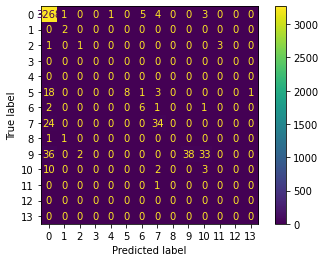

In [ ]:
get_cm(df_dev_sampled['y_test'],y_pred_bert['y_pred'],labels)

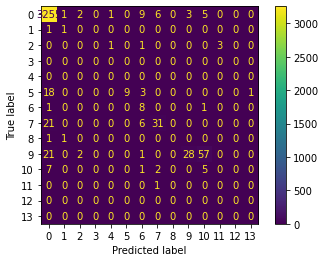

In [ ]:
get_cm(df_dev_sampled['y_test'],y_pred_xlnet['y_pred'],labels)

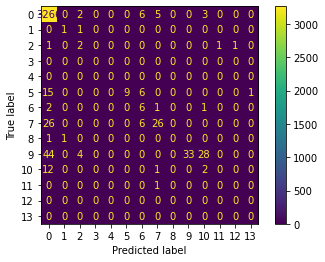

In [ ]:
get_cm(df_dev_sampled['y_test'],y_pred_distilbert['y_pred'],labels)